Kendall W über die Dimensionen


# =====================================================================
# 0. Setup: Pakete und Daten
# =====================================================================

In [12]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(reshape2)
library(knitr)
library(irr)
library(tikzDevice)
library(scales)
setwd("/Users/joern.ahlert/Desktop/Bachelorarbeit")

df <- read.csv(file.path("technische Umsetzung", "LLM as a judge",
                         "llm_evaluation_results_100_episodes.csv"))
                         
View(df)

Episode,Frage_Nr,Frage,Kontextverständnis_Score,Kohärenz_Score,Angemessenheit_Score,Gesamtplausibilität_Score
<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Welche Vorteile könnte der Kaffernbüffel aus Leben...,2.93,5,5.00,3.00
1,2,Warum kann der Kaffernbüffel auch in relativ trock...,4.69,5,4.62,3.00
1,3,Wie verändert sich das Verhalten des Kaffernbüffel...,4.80,5,5.00,3.17
1,4,Weshalb sind Bullen nicht Teil des inneren Sozialg...,4.54,5,5.00,3.29
1,5,Welche Rolle spielt die Position eines Tieres inne...,4.60,5,5.00,3.12
1,6,Aus welchen Gründen könnten weibliche Kaffernbüffe...,4.53,5,5.00,3.16
1,7,Welche Auswirkungen kann die Stellung eines Tieres...,5.00,5,5.00,4.72
1,8,Weshalb sind große Herden in bestimmten Jahreszeit...,4.63,5,5.00,3.46
2,1,Welche Vorteile könnte der Kaffernbüffel aus Leben...,2.99,5,5.00,3.00


# =====================================================================
# 1. Deskriptive Statistik – dimensionsspezifisch
# =====================================================================


In [ ]:
# Pro Episode (Durchlauf) die 8 Fragen aggregieren
df_agg_per_episode <- df %>%
  group_by(Episode) %>%
  summarise(
    Kontextverständnis = mean(Kontextverständnis_Score, na.rm = TRUE),
    Kohärenz = mean(Kohärenz_Score, na.rm = TRUE),
    Angemessenheit = mean(Angemessenheit_Score, na.rm = TRUE),
    `Plausibilität nach Zhang` = mean(Gesamtplausibilität_Score, na.rm = TRUE)
  )

# Deskriptive Statistik über die 100 Episode-Werte pro Dimension
deskriptiv_dim <- data.frame(
  Dimension = c("Kontextverständnis",
                "Kohärenz",
                "Angemessenheit",
                "Plausibilität nach Zhang"),
  Min    = c(min(df_agg_per_episode$Kontextverständnis, na.rm = TRUE),
             min(df_agg_per_episode$Kohärenz, na.rm = TRUE),
             min(df_agg_per_episode$Angemessenheit, na.rm = TRUE),
             min(df_agg_per_episode$`Plausibilität nach Zhang`, na.rm = TRUE)),
  Max    = c(max(df_agg_per_episode$Kontextverständnis, na.rm = TRUE),
             max(df_agg_per_episode$Kohärenz, na.rm = TRUE),
             max(df_agg_per_episode$Angemessenheit, na.rm = TRUE),
             max(df_agg_per_episode$`Plausibilität nach Zhang`, na.rm = TRUE)),
  M      = c(mean(df_agg_per_episode$Kontextverständnis, na.rm = TRUE),
             mean(df_agg_per_episode$Kohärenz, na.rm = TRUE),
             mean(df_agg_per_episode$Angemessenheit, na.rm = TRUE),
             mean(df_agg_per_episode$`Plausibilität nach Zhang`, na.rm = TRUE)),
  Median = c(median(df_agg_per_episode$Kontextverständnis, na.rm = TRUE),
             median(df_agg_per_episode$Kohärenz, na.rm = TRUE),
             median(df_agg_per_episode$Angemessenheit, na.rm = TRUE),
             median(df_agg_per_episode$`Plausibilität nach Zhang`, na.rm = TRUE)),
  SD     = c(sd(df_agg_per_episode$Kontextverständnis, na.rm = TRUE),
             sd(df_agg_per_episode$Kohärenz, na.rm = TRUE),
             sd(df_agg_per_episode$Angemessenheit, na.rm = TRUE),
             sd(df_agg_per_episode$`Plausibilität nach Zhang`, na.rm = TRUE))
)

kable(deskriptiv_dim, digits = 2,
      caption = "Deskriptive Statistik der LLM-Scores über 100 Iterationen (pro Episode über 8 Fragen aggregiert).")


ERROR: Error in parse(text = input): <text>:26:14: unexpected symbol
25: 
26:              max
                 ^


# Boxplot der vier Dimensionen

Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

pdf 
  2

TikZ-Datei erstellt: 58746 Bytes


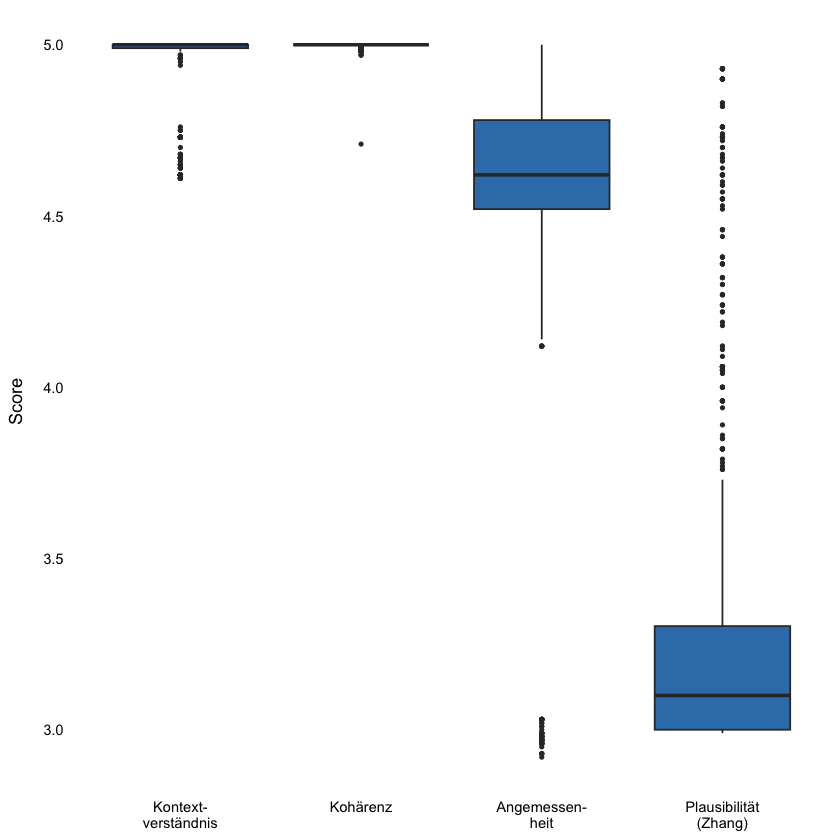

In [ ]:
# Pro Episode (Durchlauf) die 8 Fragen aggregieren
# -> Ergebnis: 100 Werte pro Dimension (einer pro Episode)
df_agg_per_episode <- df %>%
  group_by(Episode) %>%
  summarise(
    Kontextverständnis = mean(Kontextverständnis_Score, na.rm = TRUE),
    Kohärenz = mean(Kohärenz_Score, na.rm = TRUE),
    Angemessenheit = mean(Angemessenheit_Score, na.rm = TRUE),
    `Plausibilität nach Zhang` = mean(Gesamtplausibilität_Score, na.rm = TRUE)
  )

# Daten ins Long-Format transformieren (100 Werte pro Dimension)
df_long <- df_agg_per_episode %>%
  select(-Episode) %>%
  pivot_longer(
    cols = everything(),
    names_to = "Dimension",
    values_to = "Score"
  )


# LaTeX-Pfad für tikzDevice setzen
options(tikzLatex = "/Library/TeX/texbin/pdflatex")


# TikZ-Export für Overleaf
tikz(file = "boxplot_llm_dim.tex", 
     width = 6, 
     height = 4,
     standAlone = FALSE)


# Plot erstellen
p <- ggplot(df_long, aes(x = Dimension, y = Score)) +
  geom_boxplot(fill = "#377eb8", outlier.size = 0.8) +
  labs(
    title = NULL,  # GEÄNDERT: Überschrift entfernt
    x = NULL,
    y = "Score"
  ) +
  scale_x_discrete(
    labels = c(
      "Angemessen-\nheit",
      "Kohärenz",
      "Kontext-\nverständnis",
      "Plausibilität\n(Zhang)"
    )
  ) +
  scale_y_continuous(
    n.breaks = 6,
    labels = scales::number_format(accuracy = 0.1)
  ) +
  theme_minimal(base_size = 11) +  # GEÄNDERT: von 14 auf 11
  theme(
    # plot.title entfernt, da title = NULL
    axis.text.x  = element_text(angle = 0, vjust = 1, hjust = 0.5),
    axis.title.y = element_text(margin = margin(r = 10)),
    axis.text    = element_text(color = "black"),
    panel.grid   = element_blank()
  )


print(p)  # Plot für TikZ ausgeben


dev.off()  # TikZ-Device schließen


# Dateigröße prüfen
cat("TikZ-Datei erstellt:", file.info("boxplot_llm_dim.tex")$size, "Bytes\n")


# Plot im Notebook anzeigen
p


# =====================================================================
# 2. Deskriptive Statistik – aggregierter gewichteter Score
# =====================================================================

In [ ]:
# Aggregierter gewichteter Score (Kontextverständnis 30%, Kohärenz 40%, Angemessenheit 30%)
df$Aggregierter_Score <- 0.3 * df$Kontextverständnis_Score +
                        0.4 * df$Kohärenz_Score +
                        0.3 * df$Angemessenheit_Score

# Deskriptive Statistik für den aggregierten Score
aggregiert_stats <- data.frame(
  Min        = min(df$Aggregierter_Score, na.rm = TRUE),
  Max        = max(df$Aggregierter_Score, na.rm = TRUE),
  Mittelwert = mean(df$Aggregierter_Score, na.rm = TRUE),
  SD         = sd(df$Aggregierter_Score, na.rm = TRUE)
)

kable(aggregiert_stats, digits = 2,
      caption = "Deskriptive Statistik des aggregierten Scores (gewichteter Mittelwert über die drei Dimensionen).")



Table: Deskriptive Statistik des aggregierten Scores (gewichteter Mittelwert über die drei Dimensionen).

|  Min| Max| Mittelwert|   SD|
|----:|---:|----------:|----:|
| 4.38|   5|       4.83| 0.18|


# Boxplot des aggregierten Scores

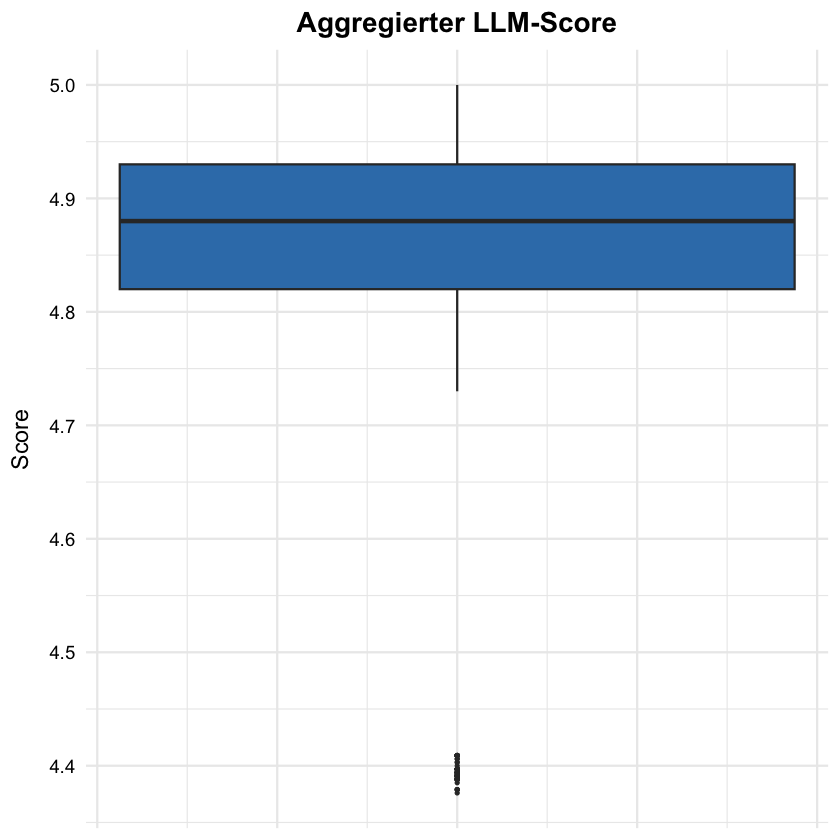

In [ ]:
ggplot(df, aes(y = Aggregierter_Score)) +
  geom_boxplot(fill = "#377eb8", outlier.size = 0.8) +
  labs(
    title = "Aggregierter LLM-Score",
    y = "Score",
    x = NULL
  ) +
  scale_y_continuous(
    n.breaks = 6,
    labels = number_format(accuracy = 0.1)
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.title.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.ticks.x = element_blank(),
    plot.title   = element_text(face = "bold", hjust = 0.5),
    axis.title.y = element_text(margin = margin(r = 10)),
    axis.text    = element_text(color = "black")
  )



# =====================================================================
# 3. Intra-Rater-Reliabilität – Kendall's W pro Dimension
# =====================================================================

In [ ]:
metriken <- c("Kontextverständnis_Score",
              "Kohärenz_Score",
              "Angemessenheit_Score",
              "Gesamtplausibilität_Score")

kendall_w_dim <- sapply(metriken, function(metric) {
  mat <- dcast(df, Frage_Nr ~ Episode, value.var = metric)
  mat <- mat[, -1]  # Frage_Nr entfernen
  kendall(mat)$value
})

m      <- 100  # Iterationen (Rater)
n      <- 8    # Fragen (Items)
df_chi <- n - 1

chi2_values <- m * (n - 1) * kendall_w_dim
p_values    <- 1 - pchisq(chi2_values, df = df_chi)

results_dim <- data.frame(
  Dimension = c("Kontextverständnis",
                "Kohärenz",
                "Angemessenheit",
                "Plausibilität nach Zhang"),
  W   = round(kendall_w_dim, 4),
  p   = p_values
)

# P-Werte schöner darstellen (z.B. "< 0.001" statt "3.13e-09")
results_dim$p_formatted <- ifelse(results_dim$p < 0.001, "< 0.001",
                                  ifelse(results_dim$p < 0.01, "< 0.01",
                                         ifelse(results_dim$p < 0.05, "< 0.05", 
                                                round(results_dim$p, 3))))

results_dim$Signifikanz <- ifelse(results_dim$p < 0.001, "***",
                           ifelse(results_dim$p < 0.01, "**",
                           ifelse(results_dim$p < 0.05, "*", "n.s.")))

kable(results_dim[, c("Dimension", "W", "p_formatted", "Signifikanz")], digits = 3,
      caption = "Intra-Rater-Reliabilität des LLM-Judges nach Dimension (Kendall's $W$).")



Table: Intra-Rater-Reliabilität des LLM-Judges nach Dimension (Kendall's $W$).

|                          |Dimension                |     W|p_formatted |Signifikanz |
|:-------------------------|:------------------------|-----:|:-----------|:-----------|
|Kontextverständnis_Score  |Kontextverständnis       | 0.780|< 0.001     |***         |
|Kohärenz_Score            |Kohärenz                 | 0.076|< 0.001     |***         |
|Angemessenheit_Score      |Angemessenheit           | 0.438|< 0.001     |***         |
|Gesamtplausibilität_Score |Plausibilität nach Zhang | 0.471|< 0.001     |***         |

# =====================================================================
# 4. Intra-Rater-Reliabilität – Kendall's W aggregiert
# =====================================================================

In [ ]:
# Aggregierter Score: Kendall's W, Chi2, p-Wert und Signifikanz

# Matrix: Zeilen = Fragen (Items), Spalten = Episoden (Rater)
mat_agg <- dcast(df, Frage_Nr ~ Episode, value.var = "Aggregierter_Score")
mat_agg <- mat_agg[, -1]  # Frage_Nr entfernen

# Kendall's W berechnen
kendall_w_agg <- kendall(mat_agg)$value

m      <- 100  # Iterationen (Rater)
n      <- 8    # Fragen (Items)
df_chi <- n - 1

chi2_agg <- m * (n - 1) * kendall_w_agg
p_agg    <- 1 - pchisq(chi2_agg, df = df_chi)

# Ergebnis-Dataframe wie bei den Dimensionen
results_agg <- data.frame(
  Score = "Aggregierter Score",
  W   = round(kendall_w_agg, 4),
  p   = p_agg
)

# P-Wert schöner darstellen
results_agg$p_formatted <- ifelse(results_agg$p < 0.001, "< 0.001",
                                  ifelse(results_agg$p < 0.01, "< 0.01",
                                         ifelse(results_agg$p < 0.05, "< 0.05", 
                                                round(results_agg$p, 3))))

results_agg$Signifikanz <- ifelse(results_agg$p < 0.001, "***",
                            ifelse(results_agg$p < 0.01, "**",
                            ifelse(results_agg$p < 0.05, "*", "n.s.")))

kable(results_agg[, c("Score", "W", "p_formatted", "Signifikanz")], digits = 3,
      caption = "Intra-Rater-Reliabilität des LLM-Judges für den aggregierten Score (Kendall's $W$).")



Table: Intra-Rater-Reliabilität des LLM-Judges für den aggregierten Score (Kendall's $W$).

|Score              |     W|p_formatted |Signifikanz |
|:------------------|-----:|:-----------|:-----------|
|Aggregierter Score | 0.809|< 0.001     |***         |